In [1]:
# load and show dataset

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# visualize
# def visualize():
# p=sns.pairplot(data,diag_kind='kde',height=1.7)
#     return p

In [4]:
# visualize()

In [5]:
# check nonnull 
data['ocean_proximity']= (data['ocean_proximity'].astype('category')).cat.codes
data = data.fillna(data.mean())
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [6]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['median_house_value'])
y = data.median_house_value

### split the data to end up with the following dataframes: X_train,X_test,y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

xscaler = StandardScaler()
yscaler = StandardScaler()

### use the scaler objects defined above to scale the data

X_train_scaled = xscaler.fit_transform(X_train)
X_test_scaled = xscaler.transform(X_test)
y_train_scaled = yscaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = yscaler.transform(y_test.values.reshape(-1,1))
print(y_train.values.shape)
print(y_train.values.reshape(-1,1).shape)

(13828,)
(13828, 1)


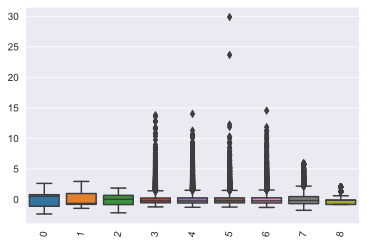

In [8]:
### perform a boxplot of X_train_scaled here
ax = sns.boxplot(data=X_train_scaled)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
plt.show()

In [ ]:
# gridsearch decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor

sc = StandardScaler()
dtr = DecisionTreeRegressor(splitter='best',random_state=42)

msp = [2,5,10]
mfeats = [X_train.shape[1],'sqrt','log2']
crit = ['mse','friedman_mse','mae']


### Validation
cval = KFold(n_splits=10, random_state=42)

pipe = Pipeline([('scaler',sc),('tree', dtr)])
model = TransformedTargetRegressor(regressor=pipe, transformer=StandardScaler())
path = model.regressor['tree'].cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp = ccp_alphas[4:-2:32]

param_grid = {'regressor__tree__min_samples_split': msp,
              'regressor__tree__max_features': mfeats,
              'regressor__tree__criterion': crit,
             'regressor__tree__ccp_alpha': ccp}
#del(param_grid['regressor__tree__ccp_alpha'])             
search = GridSearchCV(model, param_grid, n_jobs=-1,cv=cval,scoring='neg_mean_squared_error',return_train_score=True)
search.fit(X_train, y_train)
print("Best parameter RMSE=%0.3f):" % np.sqrt(-search.best_score_))
print(search.best_params_)
print('Depth: ' + str(search.best_estimator_.regressor_['tree'].get_depth()) + ' number of leaves: ' +  str(search.best_estimator_.regressor_['tree'].get_n_leaves()))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
